# Part 3: Vector Data Analysis using GeoPandas

With shapely we can perform geospatial operations on single features, but in a normal geospatial analysis we have to perform such operations on whole layers. Within GIS software (e.g. QGIS) vector layers are usually represented as attribute tables with associated geometries. 

In Python, analyses based on tables are performed using the package `Pandas`. The extention of it for geospatial analyses is called `GeoPandas`. In this notebook you will learn how to perform spatial analyses on vector data using these two packages. 

The exercises are posed in such a way that you have to refer to the documentation of the packages to find out how the methods are used:

&rarr; [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html)  
&rarr; [GeoPandas API Reference](https://geopandas.org/reference.html)  
&rarr; [GeoPandas User Guide](https://geopandas.org/)  

### Additional Python packages
For this assignment you will need to install the additional python package mplleaflet. 

`conda install mplleaflet`

### Data set: Crowed-Sourced information on bike safety in Heidelberg
Within this notebook we will analyse the data which was collected during the last mobile mapping event of the [disaster mappers HD](https://disastermappers.wordpress.com/). The task of the participants was to map and assess bike safety in Heidelberg. The results were published on [Mobile Mapping: “Nachhaltige Mobilität in Heidelberg”](https://redfrexx.github.io/mobilemapping_hd/). If you like, you can also add data by submitting it through this [Kobo survey](https://ee.kobotoolbox.org/x/ZZ1fUFa1).

After two brief introuctions to Pandas and GeoPandas, we will analyze the following questions in regard to the data set:
* Who participated in the mapping event?
* How was bike safety perceived in Heidelberg?
* Are there differences in the perceived bike safety between the districts of Heidelberg? 
* Are large streets perceived to be more dangerous than small ones? 

In the end you will perform your own analysis. 

## 1 Introduction to  `Pandas`

The collected data on bike safety is contained in a `csv` file without explicit spatial information. Therefore, we will use pandas to read the data. 

&rarr; __Please go through the user guide [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) for a more detailed introduction.__

In [3]:
import pandas as pd

In [6]:
bike_safety_file = r".\data\heidelberger_radwege_umfrage_2.csv"

In [7]:
data = pd.read_csv(bike_safety_file)

To see if the import worked correctly, you can display the first 5 rows of the data set using the `head()` method. 

In [8]:
data.head()

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
0,3,49.431396,8.668345,14.995,gut,tendenziell eher schlecht,-,gut,schlecht,-,...,gut,-,-,-,-,-,-,-,-,2020-05-22
1,2,49.378628,8.662513,0.000,tendenziell eher schlecht,tendenziell eher schlecht,-,-,-,schlecht,...,sehr schlecht,-,-,-,schlecht,-,-,-,-,2020-05-22
2,4,49.393539,8.676201,0.000,schlecht,sehr schlecht,-,schlecht,schlecht,schlecht,...,schlecht,-,neutral,neutral,neutral,schlecht,-,neutral,-,2020-05-22
3,5,49.389133,8.683078,13.966,tendenziell eher schlecht,tendenziell eher gut,-,schlecht,gut,-,...,tendenziell eher gut,-,-,gut,gut,gut,schlecht,-,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22
4,6,49.426220,8.683111,0.000,sehr schlecht,sehr schlecht,-,neutral,schlecht,neutral,...,sehr schlecht,-,schlecht,schlecht,schlecht,neutral,schlecht,neutral,Unsicherheit aufgrund schlechter Markierungen....,2020-05-22


In pandas, data is stored in `DataFrame` or `Series` objects. 

In [9]:
type(data)

pandas.core.frame.DataFrame

A series is basically a dataframe with just one column. So when we select the column "lat" of our dataframe we get a `Series`.

In [10]:
type(data["lat"])

pandas.core.series.Series

You can also create a new DataFrame from multiple Series or lists

In [11]:
new_df = pd.DataFrame({"lat": data.lat, "lon": data.lon})

### Pandas is based on NumPy.

A Pandas DataFrame object can be thought of as a __NumPy array with labels for rows and columns__. 

In [12]:
data.to_numpy()

array([[3, 49.431396484375, 8.66834545135498, ..., '-', '-',
        '2020-05-22'],
       [2, 49.37862777709961, 8.66251277923584, ..., '-', '-',
        '2020-05-22'],
       [4, 49.39353942871094, 8.676200866699219, ..., 'neutral', '-',
        '2020-05-22'],
       ...,
       [15, 49.407691955566406, 8.694391250610353, ..., 'neutral', '-',
        '2020-05-26'],
       [16, 49.3948860168457, 8.689634323120117, ..., 'neutral', '-',
        '2020-05-26'],
       [17, 49.38019561767578, 8.692331314086914, ..., '-', '-',
        '2020-05-27']], dtype=object)

In [13]:
data.columns

Index(['deviceid', 'lat', 'lon', 'precision', 'Wie gut findest du den Radweg?',
       'Wie gut findest du die technische Ausstattung der Radinfrastruktur?',
       'Ausstattung', 'Bauliche oder markierte Trennung zu FußgängerInnen',
       'Bauliche oder markierte Trennung von Autos', 'Bordsteinabsenkungen',
       'Beleuchtung', 'Radwegbelag', 'Radwegmarkierung', 'Radwegbreite',
       'Rote Markierung an Kreuzungen',
       'Gibt es eine zusätzliche technische Ausstattung?',
       'Wie ist dein generelles Sicherheitsgefühl hier?', 'Gefahren:',
       'Sichtbarkeit für AutofahrerInnen', 'Abstand zu Autos',
       'Abstand zu FußgängerInnen', 'Angemessene Geschwindigkeit der Autos',
       'Gibt es eine zusätzliche Gefahrenquelle? ',
       'Wie ist dein generelles Fahrgefühl hier?', 'Einflüsse:',
       'Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)',
       'Luftqualität', 'Lärmbelastung', 'Begrünung', 'Übersichtlichkeit',
       'Beschattung',
       'Gibt es zu

The `index` method return the row names. 

In [14]:
data.index

RangeIndex(start=0, stop=174, step=1)

Since it is based on numpy, it shares some methods with it, e.g. the `shape`.

In [15]:
data.shape

(174, 33)

However, in contrast to a regular NumPy array, a DataFrame can hold different data types. 


In [16]:
data.dtypes

deviceid                                                                 int64
lat                                                                    float64
lon                                                                    float64
precision                                                              float64
Wie gut findest du den Radweg?                                          object
Wie gut findest du die technische Ausstattung der Radinfrastruktur?     object
Ausstattung                                                             object
Bauliche oder markierte Trennung zu FußgängerInnen                      object
Bauliche oder markierte Trennung von Autos                              object
Bordsteinabsenkungen                                                    object
Beleuchtung                                                             object
Radwegbelag                                                             object
Radwegmarkierung                                    

You can change them using the `astype()` method. 

In [17]:
data = data.astype({'lat': 'float32', 'lon': 'float32', 'precision': 'float32'})

Using the `index` and `columns` of a DataFrame object you can select subsets of the data.

### Slicing dataframes
Slicing (i.e. selecting data) is done using the `.loc` method.

#### Slicing based on rows
You can select rows by their name (i.e. the index). In our case the index is just a range of numbers. 

In [18]:
data.loc[0:3] # You can also leave out the 0 to get the same result, as in numpy

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
0,3,49.431396,8.668345,14.995,gut,tendenziell eher schlecht,-,gut,schlecht,-,...,gut,-,-,-,-,-,-,-,-,2020-05-22
1,2,49.378628,8.662513,0.000,tendenziell eher schlecht,tendenziell eher schlecht,-,-,-,schlecht,...,sehr schlecht,-,-,-,schlecht,-,-,-,-,2020-05-22
2,4,49.393539,8.676201,0.000,schlecht,sehr schlecht,-,schlecht,schlecht,schlecht,...,schlecht,-,neutral,neutral,neutral,schlecht,-,neutral,-,2020-05-22
3,5,49.389133,8.683078,13.966,tendenziell eher schlecht,tendenziell eher gut,-,schlecht,gut,-,...,tendenziell eher gut,-,-,gut,gut,gut,schlecht,-,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22


#### Slicing based on columns

When you select columns, you also need to indicate the rows which you would like to select. `:` means that all rows or columns are selected.

In [19]:
data.loc[:, ["lat", "lon"]] # You can also leave out the 0 to get the same result

,lat,lon
0,49.431396,8.668345
1,49.378628,8.662513
2,49.393539,8.676201
3,49.389133,8.683078
4,49.426220,8.683111
...,...,...
169,49.409451,8.702234
170,49.413391,8.705764
171,49.407692,8.694391
172,49.394886,8.689634


#### Selecting a single column
You can select columns based on their labels. 

In [20]:
data.lat # or data["lat"]

0      49.431396
1      49.378628
2      49.393539
3      49.389133
4      49.426220
         ...    
169    49.409451
170    49.413391
171    49.407692
172    49.394886
173    49.380196
Name: lat, Length: 174, dtype: float32

#### Selecting based on attribute value

Selecting all points created by the contributor with the device id 1. 

In [21]:
data.loc[data["deviceid"] == 1]

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Wie ist dein generelles Fahrgefühl hier?,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
16,1,49.380730,8.675289,9.982532,tendenziell eher gut,tendenziell eher gut,-,schlecht,schlecht,gut,...,tendenziell eher gut,-,neutral,neutral,neutral,neutral,schlecht,schlecht,-,2020-05-22
21,1,49.382458,8.675556,12.146921,schlecht,sehr schlecht,-,schlecht,schlecht,gut,...,schlecht,-,neutral,neutral,neutral,gut,schlecht,neutral,-,2020-05-22
30,1,49.385345,8.676005,10.806641,sehr gut,sehr gut,-,neutral,gut,gut,...,sehr gut,-,gut,gut,gut,gut,gut,gut,-,2020-05-22
47,1,49.389282,8.676892,14.260504,schlecht,schlecht,-,schlecht,schlecht,gut,...,tendenziell eher schlecht,-,gut,gut,gut,gut,schlecht,gut,-,2020-05-22
72,1,49.393993,8.676526,16.376478,schlecht,schlecht,-,gut,schlecht,schlecht,...,tendenziell eher schlecht,-,schlecht,schlecht,schlecht,schlecht,schlecht,schlecht,-,2020-05-22
74,1,49.396015,8.677700,37.099487,schlecht,schlecht,-,schlecht,gut,neutral,...,tendenziell eher schlecht,-,-,-,-,-,-,-,-,2020-05-22
81,1,49.398140,8.679138,13.139303,tendenziell eher gut,tendenziell eher schlecht,-,schlecht,gut,gut,...,tendenziell eher schlecht,-,schlecht,-,-,-,schlecht,-,-,2020-05-22
90,1,49.400078,8.677968,13.749800,gut,gut,-,gut,gut,gut,...,tendenziell eher gut,-,schlecht,schlecht,schlecht,gut,neutral,schlecht,-,2020-05-22
96,1,49.402153,8.679928,15.801072,tendenziell eher gut,tendenziell eher gut,-,gut,neutral,gut,...,schlecht,-,schlecht,schlecht,schlecht,schlecht,schlecht,schlecht,-,2020-05-22
109,1,49.407730,8.676698,13.704102,gut,gut,-,gut,gut,gut,...,schlecht,-,schlecht,schlecht,schlecht,schlecht,neutral,neutral,-,2020-05-22


There are many many more functions, methods worth exploring.

&rarr; __Refer to the Pandas documentation on [Indexing and Slicing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more details.__

&rarr; It is also worth exploring the [Advanced Slicing and Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

### Calculating statistics using NumPy's ufuncs 

Since Pandas dataFrames are based on NumPy arrays, they also support method for [descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#descriptive-statistics).

In [22]:
data.mean()

deviceid      7.086207
lat          49.412445
lon           8.677152
precision    30.731546
dtype: float64

__E 1.1:__ The above expression calculates the mean along the columns. How can you calculate the mean along the rows? (The result wouldn't make sense in this case, just for demonstration purposes)

In [23]:
data.mean(axis=1)

0      19.023685
1      15.010285
2      15.517435
3      19.259553
4      16.027333
         ...    
169    18.277921
170    18.279789
171    18.275521
172    18.521130
173    20.018132
Length: 174, dtype: float64

__E 1.2:__ How can you calculate the mean along a certain column, e.g. 'precision'? 

In [99]:
data["precision"].mean()

30.731546

__E 1.3:__ Get all unique entries of the colum `submission_date`. 

In [24]:
data["submission_date"].unique()

array(['2020-05-22', '2020-05-26', '2020-05-27'], dtype=object)

## 2  Introduction to `GeoPandas`

If we want to perform spatial operations and display the data on a map, we need to convert the pandas DataFrame into a GeoDataFrame. 

GeoPandas is basically an extention of the Pandas package by adding a geometry column to the data frame and enabling spatial operations on the whole layer. For this GeoPandas relies on shapely. By the way, for reading data it relies on fiona.  

&rarr; Refer to the [GeoPandas User Guide](https://geopandas.org/) for more details. 

### Adding a geometry column 
Geopandas expects the spatial information of a row in the column called 'geometry'. Therefore, we will create a new column called `geometry` and fill each cell with a new `shapely.Point()` object which is created from the longitude (lat) and latitute (lat) values of the respective row.

In [25]:
from shapely.geometry import Point

In [26]:
data["geometry"] = data.apply(lambda x: Point(x["lon"], x["lat"]), axis=1) # axis 1 = x Achse

### Converting it to a `GeoDataFrame`

In [27]:
import geopandas as gpd

The GeoDataFrame needs a crs attributes which specifies the crs the geometery is given in. 

In [28]:
data = gpd.GeoDataFrame(data)
data.crs = {"init": "epsg:4326"}
type(data)

C:\Anaconda\envs\advgeo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


geopandas.geodataframe.GeoDataFrame

### Creating a map
We can also plot the data with geopandas, but we need to enable matplotlib within jupyter using the magic command `%matplotlib inline`.

For plotting maps we need matplotlib. Using the `figsize()` function you  can adjust the figure size within the notebook. 

In [29]:
import matplotlib as mpl
from IPython.core.pylabtools import figsize # adjusts the figure size in notebook 
%matplotlib inline

<AxesSubplot:>

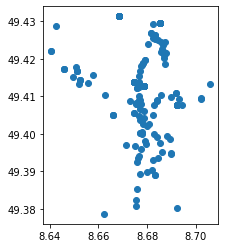

In [30]:
data.plot()

A little context would be helpful. Let's add a basemap using `mplleaflet`.

In [31]:
import mplleaflet

In [32]:
figsize(10, 10)
data.plot()
mplleaflet.display()

C:\Anaconda\envs\advgeo37\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Anaconda\envs\advgeo37\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 3 Who participated in the mapping event?

Now that the data is in the right format, we can start with the data analysis. First, we want to know who has participated in the mapping event. 

&rarr; So solve the following exercises, __refer to the [pandas reference](https://pandas.pydata.org/pandas-docs/stable/reference/)__ to find the right methods.

__E 3.1:__ Calculate the number of contributed points. 

In [33]:
len(data.geometry)

174

__E 3.2:__ Calculate the number of contributors (i.e. how many people participated)

In [34]:
data["deviceid"].nunique()

17

__E 3.3:__ Calculate the number of points per contributor. Hint: Take a look at the method `value_counts` of the pandas dataframe.

In [35]:
data["deviceid"].value_counts()# anz pts pro ussr

9     32
3     32
8     29
1     15
7     13
5      8
11     7
10     7
6      7
14     6
12     4
4      4
15     4
13     3
16     1
2      1
17     1
Name: deviceid, dtype: int64

__E 3.4:__ Calculate the mean and median number of points per contributor.

In [36]:
data["deviceid"].value_counts().mean()

10.235294117647058

In [37]:
data["deviceid"].value_counts().median()

7.0

__E 3.5:__ How many nodata values are contained in the columns? Cells without information by the contributor (i.e. nodata) are marked with a dash ('-'). Replace the '-' with `np.nan` and then count the sum of no data cells in each column.

__Hint:__ Useful methods are `replace()`, `isna()` and `sum()`

You will need numpy now, since we are using np.nan. 

In [38]:
import numpy as np

In [39]:
data_nona = data.replace("-", np.nan) 
sum_na = data_nona.isna().sum()
sum_na


deviceid                                                                 0
lat                                                                      0
lon                                                                      0
precision                                                                0
Wie gut findest du den Radweg?                                           0
Wie gut findest du die technische Ausstattung der Radinfrastruktur?      1
Ausstattung                                                            174
Bauliche oder markierte Trennung zu FußgängerInnen                      18
Bauliche oder markierte Trennung von Autos                              18
Bordsteinabsenkungen                                                    35
Beleuchtung                                                             26
Radwegbelag                                                             42
Radwegmarkierung                                                        19
Radwegbreite             

#### Precision
Next to the lat and lon column there is column called `precision`. This indicates the precision of the GPS measurement of the mobile device. Let's see how precise the points are. 

__E 3.6:__ Calculate the mean, median and 90th percentile of the precision. 

In [40]:
data["precision"].mean()

30.731546

In [41]:
data["precision"].median()

15.038

In [42]:
np.percentile(data["precision"], 90)

25.566999435424805

__E 3.7:__ Plot a histogram of the `precision` column. __Hint:__ Use the `GeoDataFrame.hist()` method. 

<AxesSubplot:ylabel='Frequency'>

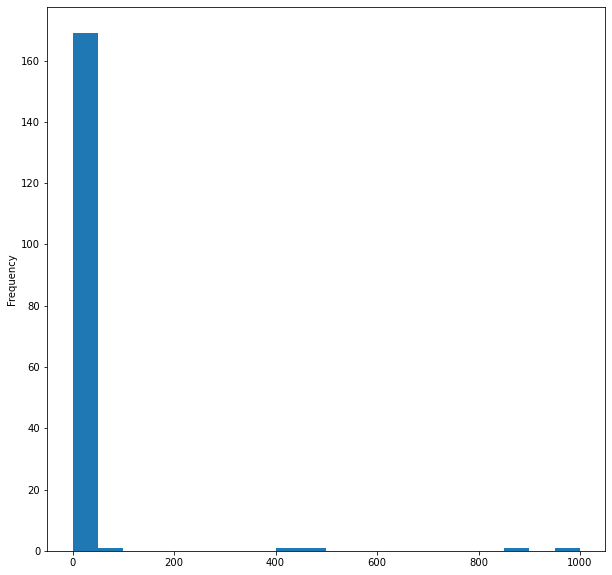

In [43]:
data["precision"].plot.hist(bins=20) # geoDataFrame.hist() = gdf_name.hist()


__E 3.7:__ There seem to be some points with high uncertainty in the GPS measurements. Let's take a look at them. Select all points whose precision is larger than 40 meters. 

In [44]:
uncertain_pts = data.where(data["precision"] >= 40.0).dropna()
uncertain_pts

,deviceid,lat,lon,precision,Wie gut findest du den Radweg?,Wie gut findest du die technische Ausstattung der Radinfrastruktur?,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date,geometry
5,5.0,49.393040,8.682407,899.999023,schlecht,schlecht,-,schlecht,schlecht,-,...,-,-,gut,gut,neutral,gut,-,-,2020-05-22,POINT (8.68241 49.39304)
7,5.0,49.393532,8.684679,459.657990,tendenziell eher schlecht,tendenziell eher schlecht,-,neutral,gut,neutral,...,-,-,schlecht,schlecht,schlecht,gut,-,-,2020-05-22,POINT (8.68468 49.39353)
9,3.0,49.408028,8.675391,57.666000,tendenziell eher gut,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2020-05-22,POINT (8.67539 49.40803)
17,8.0,49.412319,8.675887,42.577000,sehr schlecht,sehr schlecht,-,neutral,gut,schlecht,...,-,schlecht,schlecht,schlecht,neutral,schlecht,gut,-,2020-05-22,POINT (8.67589 49.41232)
24,8.0,49.412319,8.675887,42.577000,schlecht,tendenziell eher schlecht,-,neutral,schlecht,gut,...,-,gut,neutral,neutral,gut,schlecht,neutral,-,2020-05-22,POINT (8.67589 49.41232)
36,7.0,49.422024,8.640544,40.224998,gut,gut,-,schlecht,gut,schlecht,...,-,-,schlecht,schlecht,schlecht,-,schlecht,-,2020-05-22,POINT (8.64054 49.42202)
37,7.0,49.422024,8.640544,40.224998,gut,tendenziell eher gut,-,gut,gut,gut,...,-,gut,schlecht,schlecht,schlecht,neutral,schlecht,-,2020-05-22,POINT (8.64054 49.42202)
68,5.0,49.399193,8.684113,409.707001,tendenziell eher schlecht,tendenziell eher schlecht,-,neutral,gut,schlecht,...,-,-,neutral,schlecht,neutral,schlecht,gut,-,2020-05-22,POINT (8.68411 49.39919)
123,14.0,49.415684,8.657790,1000.000000,tendenziell eher gut,tendenziell eher gut,-,gut,neutral,gut,...,-,gut,schlecht,schlecht,gut,gut,neutral,-,2020-05-22,POINT (8.65779 49.41568)



__E 3.8:__ Plot the uncertain points on a map. 

In [45]:
figsize(10, 10)
uncertain_pts.plot()
mplleaflet.display()
#uncertain_pts.shape

C:\Anaconda\envs\advgeo37\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Anaconda\envs\advgeo37\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


__E 3.9:__ Was there one specific device from which the uncertain GPS measurements originated or were they distributed among several devices?

In [46]:
uncertain_devices= uncertain_pts["deviceid"].value_counts()
uncertain_devices

5.0     3
7.0     2
8.0     2
14.0    1
3.0     1
Name: deviceid, dtype: int64

__E 3.10.:__ For the remaining analysis we want to exclude these uncertain points. Remove all points from the dataframe `data` whose precision is larger than 40 meters. 

In [51]:

data_clean = data.where(data["precision"] < 40.0).dropna()  # drop all which are bigger than 40
data_clean.shape


(165, 34)

## 4 How is bike safety perceived in Heidelberg?

Now let's look at the collected data itself. We are only going to classify the main criteria for now: 
* 'Wie gut findest du den Radweg?'
* 'Wie gut findest du die technische Ausstattung der Radinfrastruktur?'
* 'Wie ist dein generelles Sicherheitsgefühl hier?'
* 'Wie ist dein generelles Fahrgefühl hier?'

### Exploring the main criteria

__E 4.1:__ The ratings are given as strings and are therefore not well suitable for statistical analysis. Reclassify them to numeric values of the range 1 (sehr gut) to 6 (sehr schlecht). Save the result to a new dataframe called `data_num`.

__Hint:__ Use the method `.replace()`

In [52]:
reclass_dict = {"sehr gut": 1, "gut": 2, "tendenziell eher gut": 3, "tendenziell eher schlecht":4, 
               "schlecht": 5, "sehr schlecht":6, 'tendenziell eher  schlecht':4, "-": np.nan, "neutral": 3}

In [53]:
data_num = data_clean.replace(reclass_dict)# or df.replace({col_name{Akey:value}})
data_num.head


<bound method NDFrame.head of      deviceid        lat       lon  precision  Wie gut findest du den Radweg?  \
0         3.0  49.431396  8.668345     14.995                               2   
1         2.0  49.378628  8.662513      0.000                               4   
2         4.0  49.393539  8.676201      0.000                               5   
3         5.0  49.389133  8.683078     13.966                               4   
4         6.0  49.426220  8.683111      0.000                               6   
..        ...        ...       ...        ...                             ...   
169      15.0  49.409451  8.702234      0.000                               2   
170      15.0  49.413391  8.705764      0.000                               2   
171      15.0  49.407692  8.694391      0.000                               1   
172      16.0  49.394886  8.689634      0.000                               3   
173      17.0  49.380196  8.692331      5.000                               5  

__E 4.2:__ The column names are quite long, which makes it a bit cumbersome to slice the dataframe by column names. Rename the columns of the `data_num` dataframe according to this dictionary. 

__Hint:__ Use the method `.rename()`

In [54]:
column_dict = {'Wie gut findest du den Radweg?': "Allgemein", 
              'Wie gut findest du die technische Ausstattung der Radinfrastruktur?': "Technische Ausstattung",
              'Wie ist dein generelles Sicherheitsgefühl hier?': "Sicherheitsgefühl",
              'Wie ist dein generelles Fahrgefühl hier?': "Fahrgefühl"}

In [55]:

data_num =data_num.rename(column_dict, axis=1)
data_num

,deviceid,lat,lon,precision,Allgemein,Technische Ausstattung,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date,geometry
0,3.0,49.431396,8.668345,14.995,2,4,NaN,2.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,POINT (8.66835 49.43140)
1,2.0,49.378628,8.662513,0.000,4,4,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2020-05-22,POINT (8.66251 49.37863)
2,4.0,49.393539,8.676201,0.000,5,6,NaN,5.0,5.0,5.0,...,NaN,3.0,3.0,3.0,5.0,NaN,3.0,NaN,2020-05-22,POINT (8.67620 49.39354)
3,5.0,49.389133,8.683078,13.966,4,3,NaN,5.0,2.0,NaN,...,NaN,NaN,2.0,2.0,2.0,5.0,NaN,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22,POINT (8.68308 49.38913)
4,6.0,49.426220,8.683111,0.000,6,6,NaN,3.0,5.0,3.0,...,NaN,5.0,5.0,5.0,3.0,5.0,3.0,Unsicherheit aufgrund schlechter Markierungen....,2020-05-22,POINT (8.68311 49.42622)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,15.0,49.409451,8.702234,0.000,2,2,NaN,2.0,3.0,2.0,...,NaN,2.0,2.0,2.0,3.0,3.0,2.0,NaN,2020-05-26,POINT (8.70223 49.40945)
170,15.0,49.413391,8.705764,0.000,2,2,NaN,5.0,2.0,2.0,...,NaN,3.0,3.0,3.0,2.0,3.0,3.0,NaN,2020-05-26,POINT (8.70576 49.41339)
171,15.0,49.407692,8.694391,0.000,1,1,NaN,2.0,2.0,2.0,...,NaN,3.0,3.0,3.0,2.0,2.0,3.0,NaN,2020-05-26,POINT (8.69439 49.40769)
172,16.0,49.394886,8.689634,0.000,3,3,NaN,2.0,2.0,2.0,...,NaN,NaN,2.0,NaN,2.0,3.0,3.0,NaN,2020-05-26,POINT (8.68963 49.39489)


__E 4.3:__ Create a dataframe object called `main_criteria` which contains only the 4 main criteria, i.e. the 4 columns we just renamed.

__Hint:__ You can convert the GeoDataFrame to a normal DataFrame now, since we got rid of the geometry column anyways. 

In [132]:
data_num = pd.DataFrame(data_num) #.drop(columns='geometry'))
#data_num.info
main_criteria = data_num[["Allgemein", "Technische Ausstattung","Sicherheitsgefühl","Fahrgefühl"]]
main_criteria

,Allgemein,Technische Ausstattung,Sicherheitsgefühl,Fahrgefühl
0,2,4,2.0,2.0
1,4,4,5.0,6.0
2,5,6,6.0,5.0
3,4,3,3.0,3.0
4,6,6,6.0,6.0
...,...,...,...,...
169,2,2,2.0,1.0
170,2,2,2.0,3.0
171,1,1,1.0,2.0
172,3,3,2.0,3.0


__E 4.4:__ Calculate the mean and standard deviation of the rating of each criteria

In [133]:
main_criteria.mean(axis=0)

Allgemein                 3.412121
Technische Ausstattung    3.781818
Sicherheitsgefühl         3.298137
Fahrgefühl                3.408805
dtype: float64

In [134]:
main_criteria.std(axis=0)

Allgemein                 1.569480
Technische Ausstattung    1.530474
Sicherheitsgefühl         1.560628
Fahrgefühl                1.501956
dtype: float64

__E 4.5:__ Calculate a correclation matrix between all columns. 
    
__Hint:__ Use the method `.corr()`

In [135]:
main_criteria.corr() # method{‘pearson’, ‘kendall’, ‘spearman’} 

,Allgemein,Technische Ausstattung,Sicherheitsgefühl,Fahrgefühl
Allgemein,1.000000,0.786515,0.808400,0.831234
Technische Ausstattung,0.786515,1.000000,0.633022,0.595635
Sicherheitsgefühl,0.808400,0.633022,1.000000,0.845270
Fahrgefühl,0.831234,0.595635,0.845270,1.000000


Do you see any patterns? 

#### Answer: 
Strong positive correlation between all variables, especially between "Sicherheitsgefühl" and "Fahrgefühl".
Variable "Allgemein" is always highly influenced by the other ones due to the fact that it gives a summarized assessment.
Variable "Technische Ausstattung" correlates to "Fahrgefühl" with the lowest correlation coefficient of R= ~0.60.


__E 4.6:__ What is the mean rating of each criteria per contributor? Join the column "deviceid" to the `main_criteria` data frame using the `DataFrame.join()` method.

&rarr; For joining tables, take a look at the section [Merge, join, concatenate and compare](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Then group the rows by `deviceid` using the `groupby()` method. 

&rarr; For grouping take a look at the section [Group by: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [136]:
main_criteria = main_criteria.join(data_num["deviceid"])#, lsuffix='_caller', rsuffix='_other')
mean_rating =main_criteria.groupby('deviceid').mean()
mean_rating

,Allgemein,Technische Ausstattung,Sicherheitsgefühl,Fahrgefühl
deviceid,,,,
1.0,3.266667,3.200000,3.266667,3.533333
2.0,4.000000,4.000000,5.000000,6.000000
3.0,2.935484,3.677419,2.483871,2.620690
4.0,5.500000,5.500000,4.750000,5.250000
5.0,5.000000,5.000000,4.600000,4.800000
6.0,5.142857,5.000000,5.428571,5.142857
7.0,2.272727,2.454545,2.333333,2.888889
8.0,3.444444,3.888889,3.740741,3.666667
9.0,3.250000,3.843750,2.687500,2.906250


__E 4.7:__ Create a boxplot showing the distribution of ratings of each main criteria. 

&rarr; Take a look at [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:>

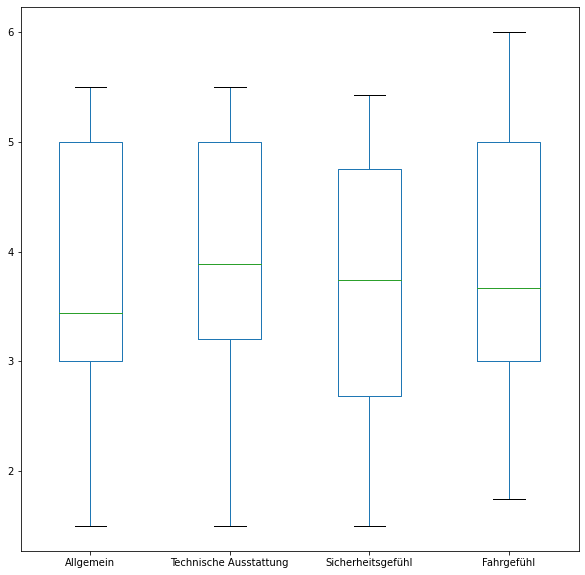

In [137]:
mean_rating.plot.box()

__Question:__ What is the oveall perception of bike safety in Heidelberg? Are there any relationships between the 4 main criteria that were surveyed?

__Answer:__

Bike safety seems to be quite bad in Heidelberg for the investigated streets, but the uncertainty is quite high due to a quite small sample of 17 devices = 17 tester
--> the individual impression is quite relevant, that can be seen by the large range of IQR (inter quantiles range) and the length of the wiskers (going up to very good /very bad)
in 50% of the cases the 4 criteria were rated between quite good to bad (quantiles)


## 5 Are there differences in the perceived bike safety between the districts of Heidelberg? 

From the map we can see that the points are not evenly distributed across Heidelberg. So let's aggregate the data based on the districts of Heidelberg.

__E 5.1:__ Read the following file containing the districts of Heidelberg into a variable called `districts`. What's the coordinate reference system of dataframe? 

In [138]:
districts_hd_file = r".\data\districts_hd.geojson"

In [139]:
# read json with geopandas (based on fiona-package)
gpd.read_file(districts_hd_file) 


,id,Stadtteil,kfz_Wert,num_compet,length_cyc,number_cyc,EW_18-44,EW_18-29We,EW_30-44We,EW/ha_veri,PDL_INDEX!,geometry
0,1,Ziegelhausen,560,9.0,62246.68409,136,3537,1737,1800,46.2,2.2,"POLYGON ((480764.164 5477381.703, 480853.053 5..."
1,2,Schlierbach,505,2.0,24812.33180,55,1295,756,539,24.8,1.6,"POLYGON ((480147.953 5473996.934, 480188.120 5..."
2,3,Neuenheim,442,22.0,55215.33809,189,6465,3594,2871,54.9,2.8,"POLYGON ((480216.410 5475108.836, 480356.075 5..."
3,4,Altstadt,352,102.0,38413.26012,147,5958,3590,2368,72.1,2.2,"POLYGON ((477686.024 5473293.203, 477749.167 5..."
4,5,Handschuhsheim,422,18.0,50210.43886,229,8837,5471,3366,67.2,2.8,"POLYGON ((475017.211 5473832.678, 475013.586 5..."
5,6,Boxberg,404,3.0,4470.96914,38,1511,663,848,95.8,2.2,"POLYGON ((479347.636 5470163.669, 479386.030 5..."
6,7,Emmertsgrund,404,0.0,2960.49639,23,2433,1207,1226,160.8,2.2,"POLYGON ((478310.790 5468834.697, 478330.779 5..."
7,8,Rohrbach,506,19.0,33600.70771,158,7444,4078,3366,54.9,2.4,"POLYGON ((478914.019 5467136.405, 478664.077 5..."
8,9,Suedstadt,419,3.0,20874.48125,109,2432,1323,1109,41.1,1.8,"POLYGON ((476513.612 5470283.147, 476525.115 5..."
9,11,Kirchheim,417,14.0,68125.88494,241,8050,4127,3923,36.5,2.6,"POLYGON ((476635.591 5471434.919, 476627.665 5..."


In [140]:
districts = gpd.read_file(districts_hd_file) 
districts.crs # get CRS

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 6°E to 12°E - by country
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

__E 5.2:__ We only need the columns 'geometry' and 'Stadtteil'. Remove all other columns dataframe. 

In [141]:
# districts[["Stadtteil", "geometry"]]
## OR  
districts= districts.loc[:, districts.columns.isin(["Stadtteil", "geometry"])]
districts#.crs

,Stadtteil,geometry
0,Ziegelhausen,"POLYGON ((480764.164 5477381.703, 480853.053 5..."
1,Schlierbach,"POLYGON ((480147.953 5473996.934, 480188.120 5..."
2,Neuenheim,"POLYGON ((480216.410 5475108.836, 480356.075 5..."
3,Altstadt,"POLYGON ((477686.024 5473293.203, 477749.167 5..."
4,Handschuhsheim,"POLYGON ((475017.211 5473832.678, 475013.586 5..."
5,Boxberg,"POLYGON ((479347.636 5470163.669, 479386.030 5..."
6,Emmertsgrund,"POLYGON ((478310.790 5468834.697, 478330.779 5..."
7,Rohrbach,"POLYGON ((478914.019 5467136.405, 478664.077 5..."
8,Suedstadt,"POLYGON ((476513.612 5470283.147, 476525.115 5..."
9,Kirchheim,"POLYGON ((476635.591 5471434.919, 476627.665 5..."


__E 5.3:__ Perform a spatial join between the dataframe `data_num` and the districts. Save it to a new variables called `data_with_district`.

&rarr; Take a look at the [GeoPandas User Manual on Spatial Joins](https://geopandas.org/mergingdata.html#spatial-joins).

In [142]:
## change df to geopandas df
data_num= gpd.GeoDataFrame(data_num) 
#data_num2.crs

## transform districts.crs --> data_num.crs
districts= districts.to_crs(data_num.crs)

## how=left --> keep the polygons (districts) as geometry_column, not the points
data_with_districts = gpd.sjoin(districts,data_num, how="left", op='intersects')
data_with_districts

,Stadtteil,geometry,index_right,deviceid,lat,lon,precision,Allgemein,Technische Ausstattung,Ausstattung,...,Fahrgefühl,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date
0,Ziegelhausen,"POLYGON ((8.73462 49.44879, 8.73584 49.44912, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Schlierbach,"POLYGON ((8.72628 49.41833, 8.72684 49.41861, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neuenheim,"POLYGON ((8.72717 49.42833, 8.72911 49.42709, ...",135.0,9.0,49.418537,8.687353,16.416000,1.0,3.0,NaN,...,1.0,NaN,3.0,5.0,5.0,3.0,2.0,5.0,NaN,2020-05-22
2,Neuenheim,"POLYGON ((8.72717 49.42833, 8.72911 49.42709, ...",131.0,9.0,49.420334,8.687101,24.975000,2.0,4.0,NaN,...,1.0,NaN,2.0,2.0,2.0,2.0,3.0,3.0,NaN,2020-05-22
2,Neuenheim,"POLYGON ((8.72717 49.42833, 8.72911 49.42709, ...",127.0,9.0,49.421082,8.686985,16.902000,3.0,4.0,NaN,...,2.0,NaN,2.0,2.0,2.0,2.0,3.0,2.0,NaN,2020-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Bergheim,"POLYGON ((8.65650 49.41105, 8.65657 49.41231, ...",156.0,9.0,49.408955,8.684220,36.161999,5.0,5.0,NaN,...,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,NaN,2020-05-22
14,Bergheim,"POLYGON ((8.65650 49.41105, 8.65657 49.41231, ...",129.0,1.0,49.408978,8.676551,15.350367,4.0,2.0,NaN,...,4.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,NaN,2020-05-22
14,Bergheim,"POLYGON ((8.65650 49.41105, 8.65657 49.41231, ...",10.0,8.0,49.410011,8.676891,25.000000,2.0,2.0,NaN,...,3.0,NaN,5.0,5.0,5.0,5.0,2.0,5.0,NaN,2020-05-22
14,Bergheim,"POLYGON ((8.65650 49.41105, 8.65657 49.41231, ...",42.0,10.0,49.410255,8.685634,0.000000,3.0,3.0,NaN,...,3.0,NaN,3.0,3.0,3.0,2.0,3.0,2.0,NaN,2020-05-22


__E 5.4:__ Calculate the number of point per district. 

In [143]:
pts_per_district= data_with_districts['Stadtteil'].value_counts()
pts_per_district

Handschuhsheim    42
Neuenheim         37
Bergheim          29
Weststadt         15
Wieblingen        14
Suedstadt          8
Kirchheim          8
Bahnstadt          7
Altstadt           4
Rohrbach           1
Boxberg            1
Emmertsgrund       1
Ziegelhausen       1
Schlierbach        1
Pfaffengrund       1
Name: Stadtteil, dtype: int64

__E 5.5:__ Create a pie chart showing the number of points per district. 

&rarr; Take a look at &rarr; [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:ylabel='Stadtteil'>

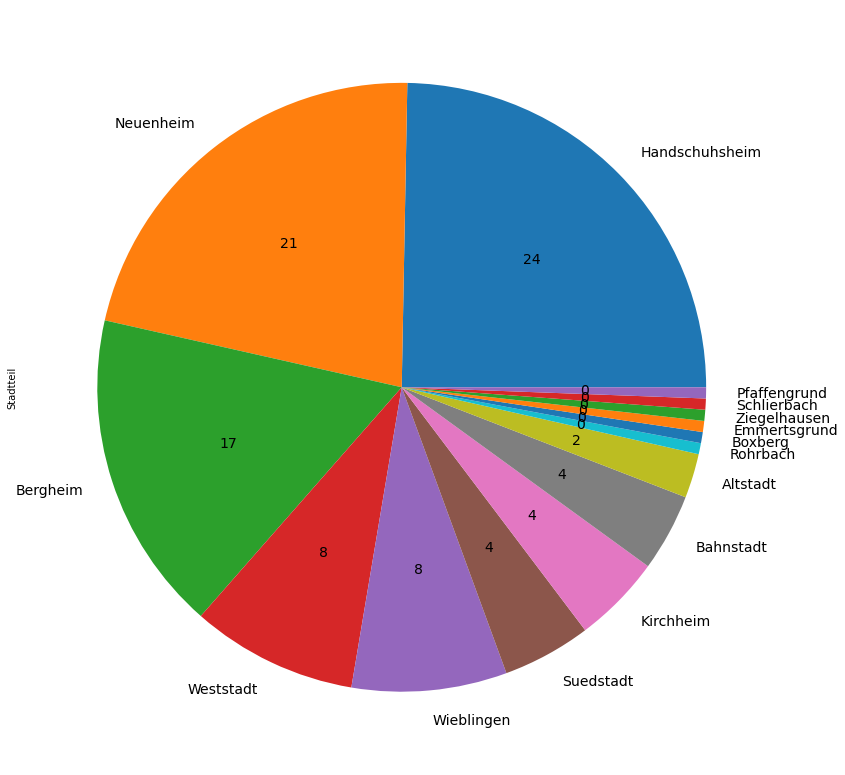

In [144]:
pts_per_district.plot.pie(autopct="%i", fontsize=14, figsize=(15, 14)) # subplots=True --> if multiple cols

__E 5.6:__ Calculate the number of contributors per district. 

In [151]:
## nunique --> count unique elements

contribs_per_district = data_with_districts["deviceid"].groupby(data_with_districts['Stadtteil']).nunique()
contribs_per_district.sort_values(ascending=False)


Stadtteil
Bergheim          8
Weststadt         7
Suedstadt         5
Neuenheim         5
Kirchheim         4
Handschuhsheim    4
Bahnstadt         4
Wieblingen        3
Altstadt          2
Rohrbach          1
Name: deviceid, dtype: int64

__E 5.7:__ Create a horizontal bar chart showing the number of contributors per district. Sort the dataframe by the column "deviceid" ( `.sort_values()`) before plotting so that they are shown in descending order. 

&rarr; Take a look at [Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to find the method to create a horizontal barplot. 

<AxesSubplot:ylabel='Stadtteil'>

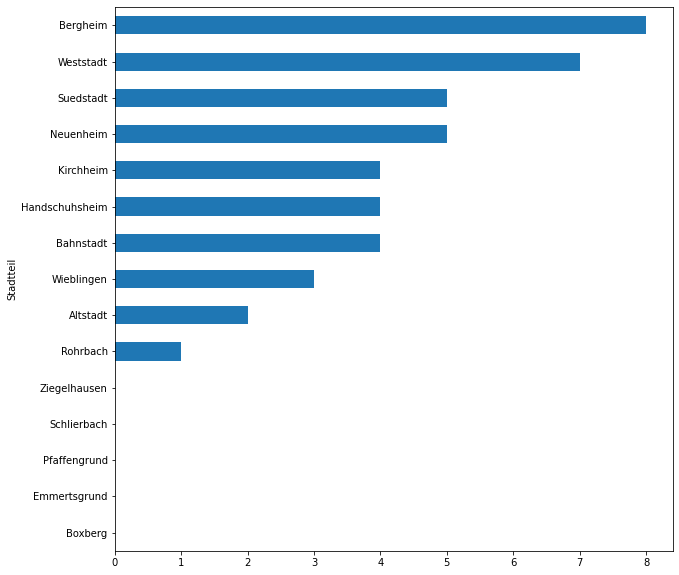

In [146]:
contribs_per_district= contribs_per_district.sort_values()
contribs_per_district.plot.barh(stacked=True)

__E 5.8:__ Create a boxplot showing the rating "Allgemein" across all districts. Join the dataframes `main_criteria` and `data_with_district["Stadtteil"]`. Afterwards create a boxplot using the method `DataFrame.boxplot()`.

In [153]:
## delete all districts without any contributor to get the same length as DF main_criteria
data_with_districts.dropna(subset=["deviceid"],axis="rows", inplace=True)
#data_with_districts

<AxesSubplot:title={'center':'Allgemein'}, xlabel='Stadtteil'>

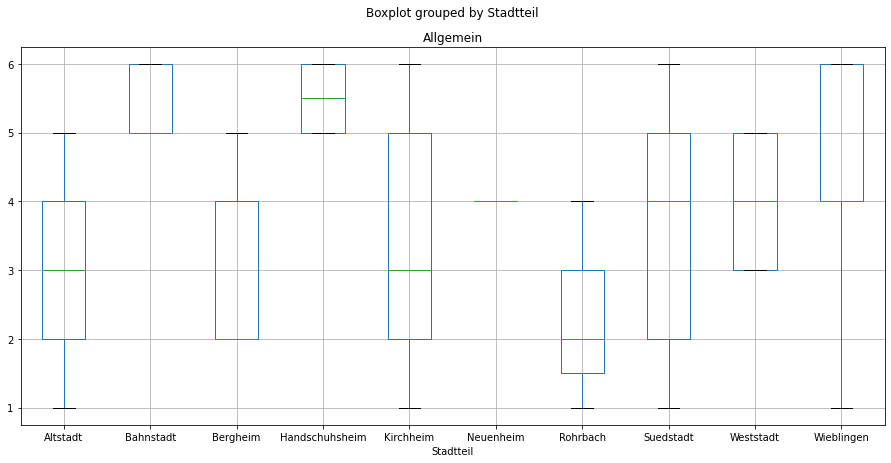

In [154]:
data_districts_criteria = main_criteria.join(data_with_districts["Stadtteil"], on="deviceid")

data_districts_criteria.boxplot(column="Allgemein", by="Stadtteil",figsize=(15,7))


__Question:__ 
1. Which differences do you see in the number of contributors, the number of points and the perceived bike safety? 
2. How reliable are these findings based on the collected data?

__Answer:__ 

#### 1.
- The number of contributors ranges between 0 and 8 per district, this means that the individual assessment of each contributor influence the statistic quite a lot. Some districts have no contibutor at all.
- Best tagged areas are in Handschuhsheim, Neuenheim and Bergheim, but that doesnt mean necessarily that those districts also have the most contributors. Like in Handschuhsheim were four people super active and tagged the highest number of points (42) of all districts.
- The contribution is highly located. So nearly half of all districts have less than 10 pts and base on less than 5 contributors.
- Many streets werent tagged at all

##### 2.
- Good for an overview and to get a 'feeling' of the data, but not reliable (low number of points and just one/two contributers in some districts). It is more like a snapshot for current situation based on just a small timespan 


## 6 Are large streets perceived to be more dangerous than small ones? 

On the map it seems like points located close to the main streets show worse ratings than others. We will analyze this by calculating the distance to main streets extracted from OpenStreetMap. 

### Read OpenStreetMap streets

__E 6.1:__ Read the data set "streets.geojson" into a dataframe called `streets`.

In [155]:
streets_file = r".\data\streets.geojson"

In [156]:
with open(streets_file) as src:
    streets = gpd.read_file(src)
streets.head()

,@osmId,highway,lit,name,smoothness,surface,access,source:geometry,lcn,maxspeed,...,motor_vehicle:forward,conveying,sidewalk_1,dogs,ford,handrail:center,material,footway:width,separated,geometry
0,way/5097854,tertiary,None,Bierhelderhofweg,None,asphalt,None,None,yes,50,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.70323 49.38216, 8.70322 49.38211..."
1,way/24745142,tertiary,None,Saupfercheckweg,good,asphalt,None,None,None,50,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.70336 49.39077, 8.70341 49.39075..."
2,way/4084940,secondary,None,Eppelheimer StraÃŸe,None,None,None,None,None,50,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.64588 49.40309, 8.64566 49.40301..."
3,way/4280109,secondary,None,Cuzaring,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.65532 49.38345, 8.65543 49.38348..."
4,way/4379782,tertiary,yes,Henkel-Teroson-StraÃŸe,good,asphalt,None,None,yes,30,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8.65148 49.40750, 8.65178 49.40769)"


__E 6.2:__ Select all streets which contain the tag highway = primary. 

In [157]:
streets_prim = streets.loc[streets["highway"]=="primary"]

######## see next step, first transform than sellevct primary, secondary.. streets  ##########

### Calculate distance to streets
__E 6.3:__ We want to get the distance to the streets in meters. What is the coordinate references system of the geodataframes `data_num` and `streets`? Convert them to the crs with the EPSG:32632. 

__Hint:__ Some methods of Pandas (and GeoPandas) provide the parameter `inplace`. If you set `inplace=true`, the dataframe object itself will be changed and the method does not return any value. It is basically overriding the dataframe. So `dataframe.to_crs(..., inplace=True)` yields the same as `dataframe = dataframe.to_crs(...)`

In [159]:
print(streets.crs)
streets.to_crs(epsg=32632, inplace = True) ## inpalce= T dont need explizit new var

streets_prim = streets.loc[streets["highway"]=="primary"]

epsg:32632


In [160]:
print(data_num.crs)
data_num.to_crs(epsg=32632, inplace = True)
data_num

+init=epsg:4326 +type=crs


,deviceid,lat,lon,precision,Allgemein,Technische Ausstattung,Ausstattung,Bauliche oder markierte Trennung zu FußgängerInnen,Bauliche oder markierte Trennung von Autos,Bordsteinabsenkungen,...,Einflüsse:,"Fahrfluss (z.B. grüner Pfeil für Radfahrende, Fahrradampel, ...)",Luftqualität,Lärmbelastung,Begrünung,Übersichtlichkeit,Beschattung,Gibt es zusätzliche Einflussfaktoren auf das Fahrgefühl?,submission_date,geometry
0,3.0,49.431396,8.668345,14.995,2,4,NaN,2.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,POINT (475952.163 5475466.752)
1,2.0,49.378628,8.662513,0.000,4,4,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2020-05-22,POINT (475503.006 5469602.183)
2,4.0,49.393539,8.676201,0.000,5,6,NaN,5.0,5.0,5.0,...,NaN,3.0,3.0,3.0,5.0,NaN,3.0,NaN,2020-05-22,POINT (476503.686 5471255.596)
3,5.0,49.389133,8.683078,13.966,4,3,NaN,5.0,2.0,NaN,...,NaN,NaN,2.0,2.0,2.0,5.0,NaN,Unübersichtliche Kreuzung von fahrradwegen,2020-05-22,POINT (477000.650 5470763.654)
4,6.0,49.426220,8.683111,0.000,6,6,NaN,3.0,5.0,3.0,...,NaN,5.0,5.0,5.0,3.0,5.0,3.0,Unsicherheit aufgrund schlechter Markierungen....,2020-05-22,POINT (477020.388 5474886.656)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,15.0,49.409451,8.702234,0.000,2,2,NaN,2.0,3.0,2.0,...,NaN,2.0,2.0,2.0,3.0,3.0,2.0,NaN,2020-05-26,POINT (478399.763 5473016.699)
170,15.0,49.413391,8.705764,0.000,2,2,NaN,5.0,2.0,2.0,...,NaN,3.0,3.0,3.0,2.0,3.0,3.0,NaN,2020-05-26,POINT (478657.508 5473453.780)
171,15.0,49.407692,8.694391,0.000,1,1,NaN,2.0,2.0,2.0,...,NaN,3.0,3.0,3.0,2.0,2.0,3.0,NaN,2020-05-26,POINT (477830.031 5472823.468)
172,16.0,49.394886,8.689634,0.000,3,3,NaN,2.0,2.0,2.0,...,NaN,NaN,2.0,NaN,2.0,3.0,3.0,NaN,2020-05-26,POINT (477479.092 5471401.204)


__E 6.4:__ Calculate the distance from each point to the next primary street using the `distance()` method. 
    
__Hint:__ It might be necessary to unionize the streets first using `cascaded_union`.

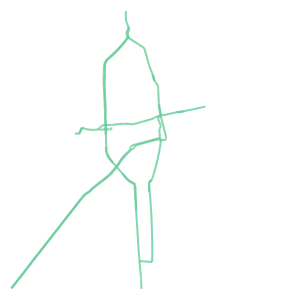

In [161]:
from shapely.ops import cascaded_union
streets_prim_unionized = cascaded_union(streets_prim["geometry"])
streets_prim_unionized

In [163]:
## calc dist: pts <-> nearest_1.street
dist_pt_1street = data_num.distance(streets_prim_unionized)
dist_pt_1street

## join distance to next primary street with DF_points
data_num_distance_1street = data_num.join(pd.DataFrame(dist_pt_1street, columns=["Distance 1. street"]))
#data_num_distance_1street

__E 6.5:__ Plot a choropleth map showing the points and their distance visualized using a color map. 

__Hint:__ If you want to use the mplleaflet.display() to plot a basemap your dataframe needs to have EPSG:4326.

&rarr; Take a look at the [GeoPandas User Guide on Choropleth Maps](https://geopandas.org/mapping.html#choropleth-maps)

In [164]:
data_num_distance_1street.to_crs(epsg=4326, inplace= True)

figsize(8, 8)

data_num_distance_1street.plot(column="Distance 1. street", cmap="plasma")#, legend=True)
mplleaflet.display()

C:\Anaconda\envs\advgeo37\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Anaconda\envs\advgeo37\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


__E 6.6:__ Create boxplots showing the distances for each rating category. Answer the question: 

In [174]:
print("Boxes closer to the left side of the plot indicate that the point lies nearby a primary road, boxes closer to the right side indicate that the points are more far away from the next primary road")

Boxes closer to the left side of the plot indicate that the point lies nearby a primary road, boxes closer to the right side indicate that the points are more far away from the next primary road


Distance to next road: min:0, max:2579


array([<AxesSubplot:title={'center':'Allgemein'}, xlabel='Distance 1. street'>,
       <AxesSubplot:title={'center':'Sicherheitsgefühl'}, xlabel='Distance 1. street'>],
      dtype=object)

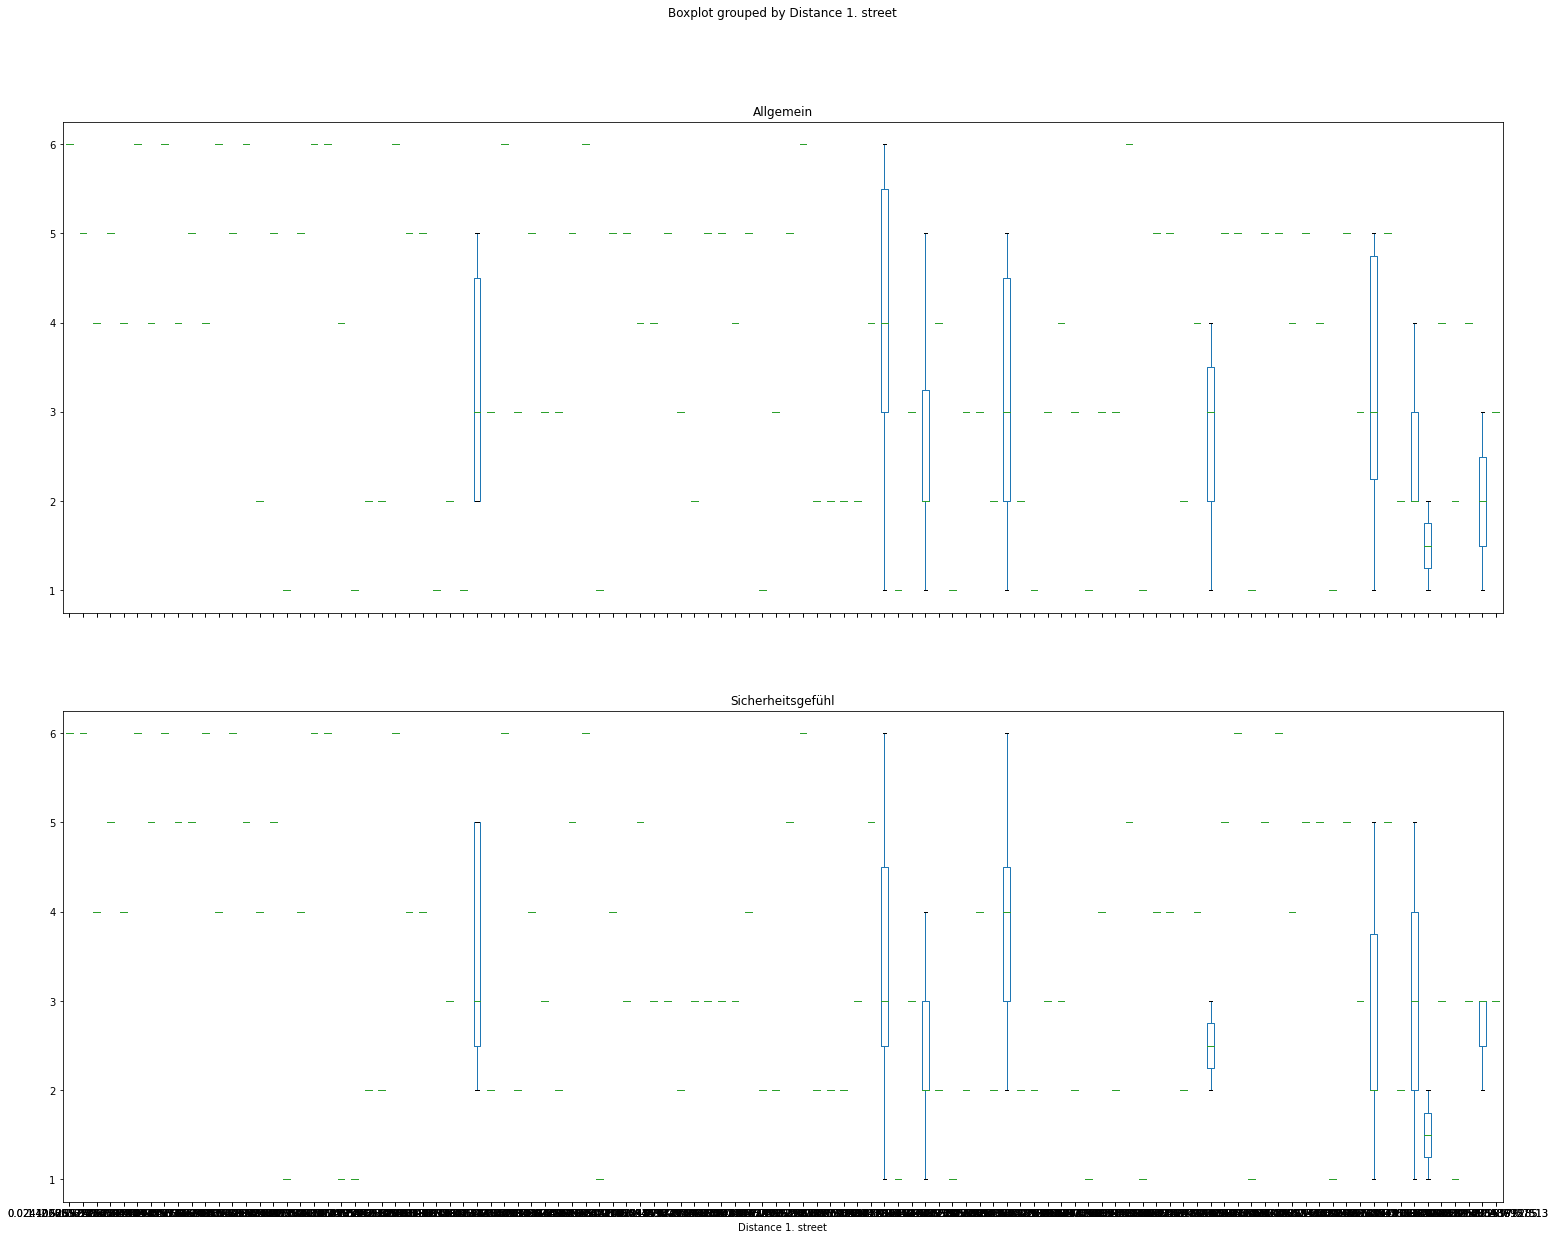

In [170]:
print("Distance to next road: min:%i, max:%i" % (min(data_num_distance_1street["Distance 1. street"]), max(data_num_distance_1street["Distance 1. street"])) )

data_num_distance_1street=data_num_distance_1street.sort_values(by="Distance 1. street")
data_num_distance_1street.boxplot(column=["Allgemein","Sicherheitsgefühl"], by="Distance 1. street",
                               grid=False, layout=(2,1), figsize=(25,20))


In [173]:
#data_num_distance_1street

__E 6.7:__ Compute the same for the distance to streets with the tag highway=secondary and highway=tertiary.

Distance to next secondary road: min:0, max:2274


array([<AxesSubplot:title={'center':'Allgemein'}, xlabel='Distance 2. street'>,
       <AxesSubplot:title={'center':'Sicherheitsgefühl'}, xlabel='Distance 2. street'>],
      dtype=object)

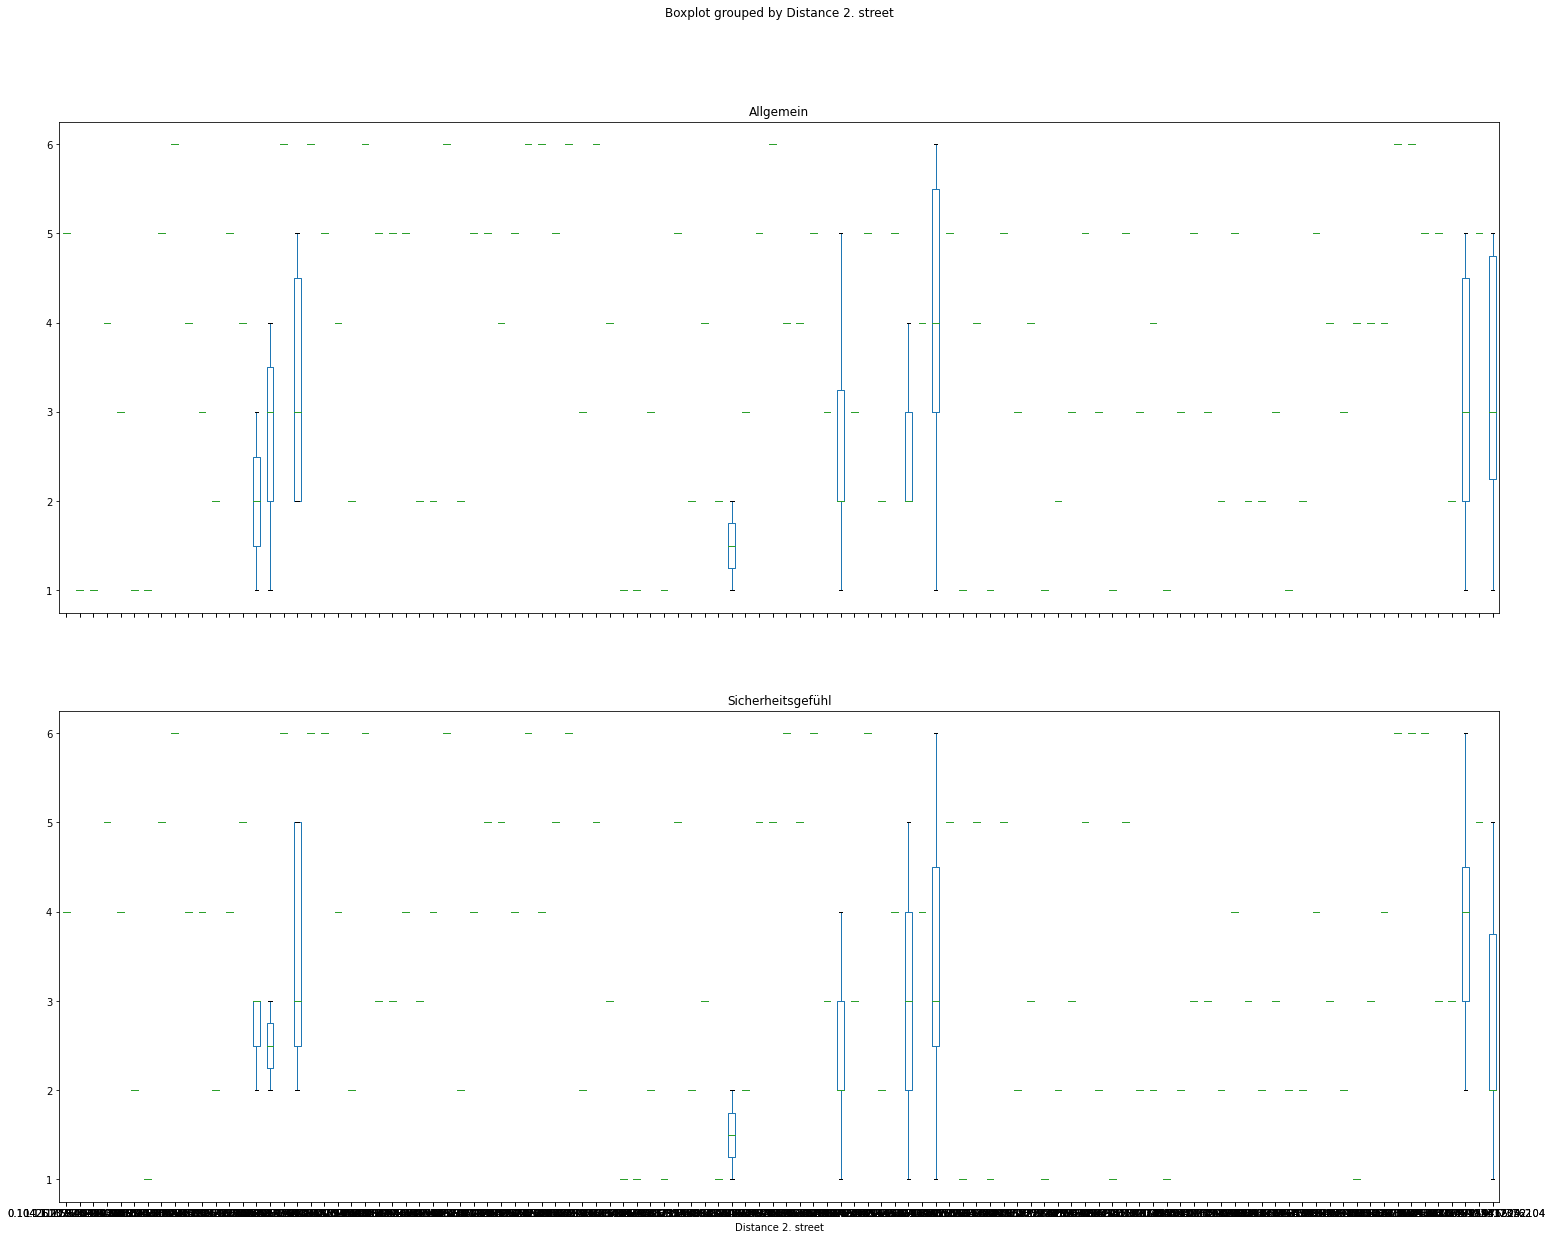

In [171]:

## distance to secondary streets

print("Distance to next secondary road: min:%i, max:%i" % (min(data_num_distance_2street["Distance 2. street"]), max(data_num_distance_2street["Distance 2. street"])) )

streets_sec = streets.loc[streets["highway"]=="secondary"]
streets_sec_unionized = cascaded_union(streets_sec["geometry"])
#streets_sec_unionized
dist_pt_2street = data_num.distance(streets_sec_unionized)
data_num_distance_2street = data_num.join(pd.DataFrame(dist_pt_2street, columns=["Distance 2. street"]))

data_num_distance_2street = data_num_distance_2street.sort_values(by="Distance 2. street")
data_num_distance_2street.boxplot(column=["Allgemein","Sicherheitsgefühl"], by="Distance 2. street",
                              grid=False, layout=(2,1), figsize=(25,20))

Distance to next tertiary road: min:0, max:1611


array([<AxesSubplot:title={'center':'Allgemein'}, xlabel='Distance 3. street'>,
       <AxesSubplot:title={'center':'Sicherheitsgefühl'}, xlabel='Distance 3. street'>],
      dtype=object)

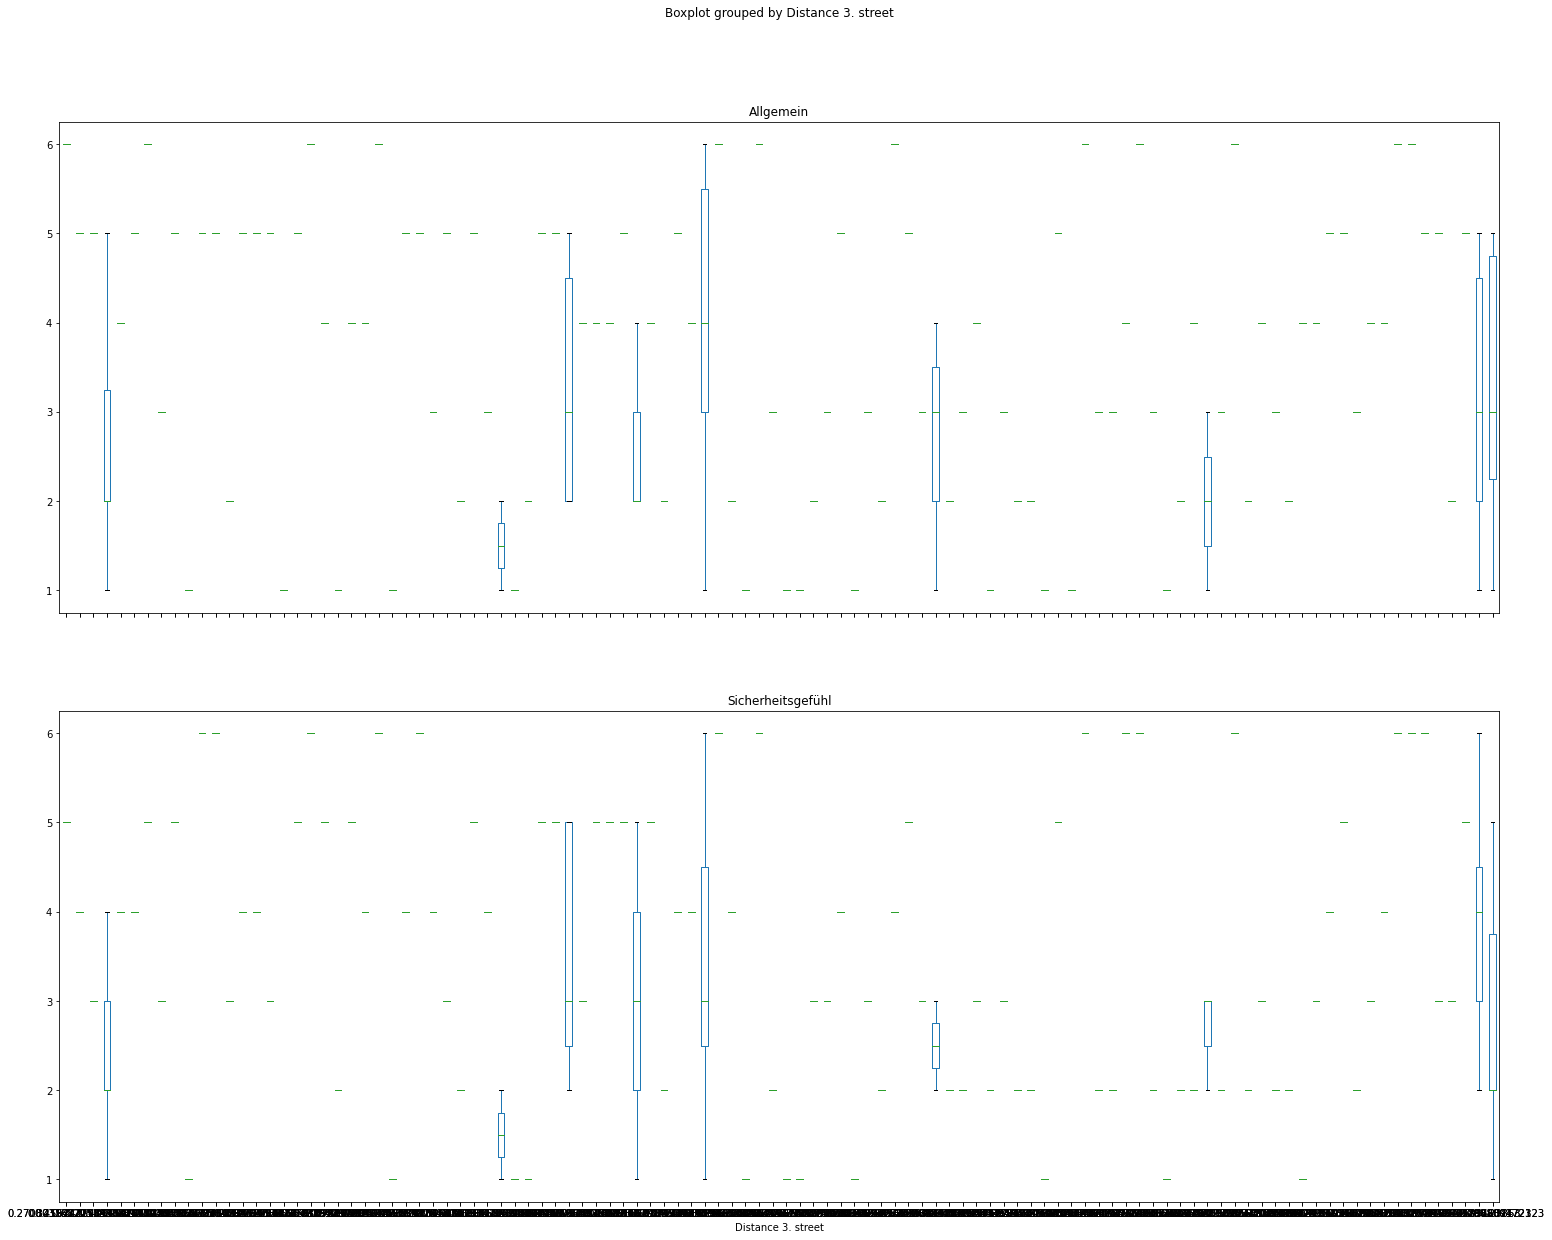

In [172]:
## distance to tertiary streets

print("Distance to next tertiary road: min:%i, max:%i" % (min(data_num_distance_3street["Distance 3. street"]), max(data_num_distance_3street["Distance 3. street"])) )

streets_tert = streets.loc[streets["highway"]=="tertiary"]
streets_tert_unionized = cascaded_union(streets_tert["geometry"])
#streets_tert_unionized
dist_pt_3street = data_num.distance(streets_tert_unionized)
data_num_distance_3street = data_num.join(pd.DataFrame(dist_pt_3street, columns=["Distance 3. street"]))

data_num_distance_3street = data_num_distance_3street.sort_values(by="Distance 3. street")
data_num_distance_3street.boxplot(column=["Allgemein","Sicherheitsgefühl"], by="Distance 3. street",
                               grid=False, layout=(2,1), figsize=(25,20))



__Question:__ Do you an influence on the safety rating based on the different street types? Are larger streets perceived as more dangerous? 

__Answer:__ 

- For the primary roads it seems that points closer to those roads have a worse ranking than more remote locations
- For the secondary and tertiary roads no tendences are clearly visible, may with some statistical parameters a tendence can be quantfied

The safety ranking, here interpreted as "Sicherheitsgefühl", also affects the overall ranking ("Allgemein"), so both were plotted.


## 7 Your Analyses

__E 7.1:__ Come up with one more geographic question and answer it using pandas and geopandas methods. 

####  Visual analyse of the relation between safety rating and clarity ranking 
Is there a correlation between safety and clarity (columns: Sicherheitsgefühl, Übersichtlichkeit)?
And in which districts is the relation quite strong or less?

In [227]:
safety_clarity_df = data_with_districts[["Sicherheitsgefühl", "Übersichtlichkeit", "Stadtteil", "geometry"]]
safety_clarity_df.groupby("Stadtteil").mean()

,Sicherheitsgefühl,Übersichtlichkeit
Stadtteil,,
Altstadt,2.250000,2.750000
Bahnstadt,3.800000,4.000000
Bergheim,3.703704,3.111111
Handschuhsheim,3.261905,3.533333
Kirchheim,4.250000,4.400000
Neuenheim,2.729730,3.640000
Rohrbach,5.000000,2.000000
Suedstadt,3.375000,4.000000
Weststadt,4.133333,4.384615


array([<AxesSubplot:title={'center':'Übersichtlichkeit'}, xlabel='[Stadtteil]'>,
       <AxesSubplot:title={'center':'Sicherheitsgefühl'}, xlabel='[Stadtteil]'>],
      dtype=object)

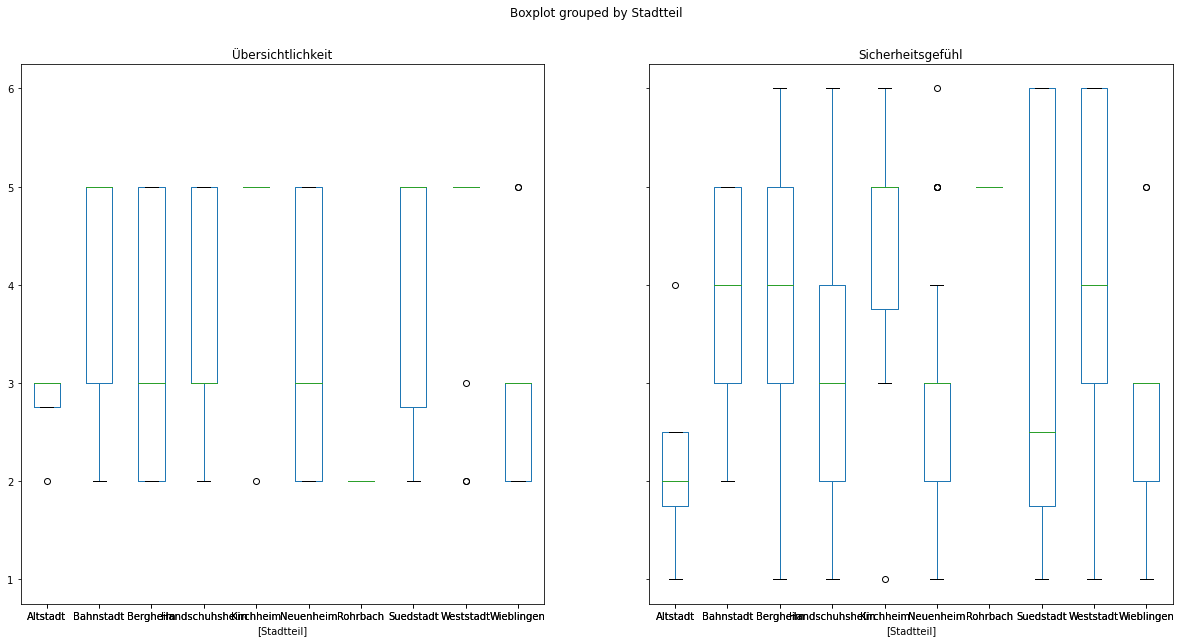

In [228]:
## transform geopandas to pd df, for plotting as pd.scatterplot
pd.DataFrame(data_with_districts).boxplot(column=["Übersichtlichkeit", "Sicherheitsgefühl"], by=["Stadtteil"],
grid=False, figsize=(20,10))

In the most districts both variables show a similar ranking, but differences are still there eg. in Neuenheim

In [263]:
## create DF with correlation coefficient per district for plotting as map

corr_df = safety_clarity_df.groupby("Stadtteil").corr() # geometry_col is deleted by corr.func
corr_df.dropna(inplace=True) # drop all districts with Na 
corr_df = corr_df.droplevel(1) # just keep the district names as index

corr_df =  corr_df.where(corr_df["Übersichtlichkeit"] != 1.0 ).dropna()
corr_df.drop("Sicherheitsgefühl", axis="columns", inplace=True)

df_plot = pd.merge(corr_df, safety_clarity_df["geometry"], how="right", left_index=True, right_on=safety_clarity_df["Stadtteil"])
df_plot = df_plot.drop_duplicates() 




In [296]:
df_plot.to_crs(epsg=4326, inplace= True)
df_plot.plot(cmap="Reds")
mplleaflet.display()

C:\Anaconda\envs\advgeo37\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Anaconda\envs\advgeo37\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [287]:
df_plot.sort_values("Übersichtlichkeit",ascending=False)

,key_0,Übersichtlichkeit,geometry
9,Kirchheim,0.875000,"POLYGON ((8.67801 49.39516, 8.67790 49.39487, ..."
8,Suedstadt,0.758558,"POLYGON ((8.67640 49.38479, 8.67655 49.38562, ..."
10,Weststadt,0.758193,"POLYGON ((8.69401 49.40743, 8.69404 49.40728, ..."
3,Altstadt,0.662266,"POLYGON ((8.69238 49.41191, 8.69325 49.41202, ..."
4,Handschuhsheim,0.661655,"POLYGON ((8.65555 49.41666, 8.65550 49.41680, ..."
14,Bergheim,0.569819,"POLYGON ((8.65650 49.41105, 8.65657 49.41231, ..."
13,Bahnstadt,0.406745,"POLYGON ((8.67023 49.40554, 8.67136 49.40511, ..."
11,Wieblingen,0.385758,"POLYGON ((8.64655 49.43663, 8.64697 49.43614, ..."
2,Neuenheim,0.043592,"POLYGON ((8.72717 49.42833, 8.72911 49.42709, ..."
7,Rohrbach,NaN,"POLYGON ((8.70964 49.35658, 8.70620 49.35602, ..."


#### A:
It was not expected that in some districts like Neuenheim the clarity of the road doesnt correlate a lot with the safety feeling on those roads. While a high correlation of R = 0.8 or 0.7 can be seen in Kirchheim, Südstadt and Weststadt. Maybe this is because those districts have quite a lot of residential areas and the common bike routes are going along less traffic roads, so a further analyse to the distance to secondary and tertiary roads (= less traffic roads) could be possible. 

__E 7.2:__ Go through the [GeoPandas](https://geopandas.org/) User guide and [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) User guides to find three more methods which we haven't applied in this analysis so far, e.g. MultiIndex, overlay, dissolve, attribute join, etc. Apply them to the data sets.

In [297]:
## MultiIndex
MultiIndex_test = pd.DataFrame(data_num_distance_1street.loc[:, ["Sicherheitsgefühl", "Distance 1. street"]])
pd.MultiIndex.from_frame(MultiIndex_test, names=["Sicherheitsgefühl", "Distance 1. street"])



MultiIndex([(6.0, 0.024102851221833057),
            (6.0,   1.4066656186665487),
            (4.0,   2.5289762905115847),
            (5.0,   2.5524967546283235),
            (4.0,   3.3532588430924313),
            (6.0,    4.167049499811569),
            (5.0,    4.231555751536124),
            (6.0,    4.272742980441485),
            (5.0,    4.394553163981074),
            (5.0,    5.076743589185729),
            ...
            (5.0,    1294.163972190176),
            (2.0,   1537.0513440582145),
            (1.0,   1537.0513440582145),
            (3.0,   1538.6008813233834),
            (1.0,   1538.8746720008987),
            (3.0,   1642.7192527553975),
            (2.0,   1893.3759923979285),
            (3.0,   1893.3759923979285),
            (3.0,   1893.3759923979285),
            (3.0,    2579.835136927513)],
           names=['Sicherheitsgefühl', 'Distance 1. street'], length=165)

In [299]:
## overlay
districts.to_crs(data_num.crs, inplace=True)
data_num_districts = gpd.overlay(data_num, districts, how="intersection",keep_geom_type=False)
data_num_districts                  

## dissolve: all pts by district
allpts_in_district = data_num_districts[['Stadtteil', 'Sicherheitsgefühl','geometry']]
allpts_in_district.dissolve(by='Stadtteil')


allpts_in_district.to_crs(epsg=4326, inplace= True)
allpts_in_district.plot(cmap="plasma")
mplleaflet.display()

C:\Anaconda\envs\advgeo37\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Anaconda\envs\advgeo37\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Anaconda\envs\advgeo37\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
